<a href="https://colab.research.google.com/github/RishikaGhosh/RegionalCharacterDetectionUsingCNN/blob/master/cmaterDB_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip drive/MyDrive/cmaterDB_dataset.zip> /dev/null

In [3]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 11.3 MB/s eta 0:00:00


In [4]:
!pip install tensorflow-addons --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import os
import cv2
from PIL import ImageFile,Image
import numpy as np

In [6]:
train_folder = "Dataset/Train" 
test_folder = "Dataset/Test"
dimensions = (28, 28)

In [8]:
train_folder = "Dataset/main/train" 
test_folder = "Dataset/main/val"
dimensions = (28, 28)

In [9]:
def process_images(folder):

    classes = [os.path.join(folder, d) for d in sorted(os.listdir(folder))]  # get list of all sub-folders in folder
    img_cnt = 0
    i=0
    for class_x in classes:
        i=i+1
        if os.path.isdir(class_x):

            # get paths to all the images in this folder
            images = [os.path.join(class_x, i) for i in sorted(os.listdir(class_x)) if i != '.DS_Store']
            print(len(images))
            if folder == "Dataset/Test" and i==1:
                images = images[:-1]

            for image in images:

                img_cnt = img_cnt + 1

                if(img_cnt % 1000 == 0):                # show progress
                    print("Processed %s images" % str(img_cnt))

                im = Image.open(image)
                print(image)
                im = im.resize(dimensions)   # resize image according to dimensions set

                im = im.convert('L')

                image_array = np.array(im)
                otsu_threshold, image_result = cv2.threshold(image_array, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                im = Image.fromarray(image_result)

                im.save(image)
    print("Finished processing images, images found = ")
    print(img_cnt)
process_images(train_folder)
process_images(test_folder)

Streaming output truncated to the last 5000 lines.
Dataset/main/train/204/bcc000179.bmp
Dataset/main/train/204/bcc000180.bmp
Dataset/main/train/204/bcc000182.bmp
Dataset/main/train/204/bcc000183.bmp
Dataset/main/train/204/bcc000184.bmp
Dataset/main/train/204/bcc000185.bmp
Dataset/main/train/204/bcc000186.bmp
Dataset/main/train/204/bcc000188.bmp
Dataset/main/train/204/bcc000189.bmp
Dataset/main/train/204/bcc000190.bmp
Dataset/main/train/204/bcc000191.bmp
Dataset/main/train/204/bcc000192.bmp
Dataset/main/train/204/bcc000193.bmp
Dataset/main/train/204/bcc000195.bmp
Dataset/main/train/204/bcc000196.bmp
Dataset/main/train/204/bcc000197.bmp
Dataset/main/train/204/bcc000199.bmp
Dataset/main/train/204/bcc000200.bmp
Dataset/main/train/204/bcc000201.bmp
Dataset/main/train/204/bcc000203.bmp
Dataset/main/train/204/bcc000204.bmp
Dataset/main/train/204/bcc000205.bmp
Dataset/main/train/204/bcc000206.bmp
Dataset/main/train/204/bcc000207.bmp
Dataset/main/train/204/bcc000208.bmp
Dataset/main/train/204/b

In [40]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1), padding = "same", input_shape = (28, 28, 1)))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
# classifier.add(Dropout(.5))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1,1), padding = "same"))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
# classifier.add(Dropout(.5))

classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1,1), padding = "same"))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
# classifier.add(Dropout(.5))

classifier.add(Flatten())

classifier.add(Dense(units = 128))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(Dropout(.2))

classifier.add(Dense(units = 64))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(Dropout(.2))

classifier.add(Dense(units = 50, activation = 'softmax'))

opt=tf.keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95)              
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [41]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

In [42]:
train_folder = "/content/Dataset/main/train"
val_folder = "/content/Dataset/main/val"
test_folder = "/content/Dataset/Test"

In [13]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [14]:
Image.LOAD_TRUNCATED_IMAGES = True


train_datagen = ImageDataGenerator(shear_range = .2, rotation_range = 25)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_set = train_datagen.flow_from_directory(train_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")
val_set = val_datagen.flow_from_directory(val_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")
test_set = test_datagen.flow_from_directory(test_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")

Found 10800 images belonging to 50 classes.
Found 1200 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.


In [43]:
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 50,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights1.h5')

Epoch 1/50
338/338 [==============================] - 11s 25ms/step - loss: 4.7935 - accuracy: 0.0343 - val_loss: 3.6074 - val_accuracy: 0.1025
Epoch 2/50
338/338 [==============================] - 9s 27ms/step - loss: 3.6317 - accuracy: 0.0988 - val_loss: 3.1139 - val_accuracy: 0.2317
Epoch 3/50
338/338 [==============================] - 8s 23ms/step - loss: 3.2305 - accuracy: 0.1744 - val_loss: 2.6032 - val_accuracy: 0.3292
Epoch 4/50
338/338 [==============================] - 9s 27ms/step - loss: 2.8834 - accuracy: 0.2476 - val_loss: 2.1567 - val_accuracy: 0.4383
Epoch 5/50
338/338 [==============================] - 9s 27ms/step - loss: 2.5257 - accuracy: 0.3199 - val_loss: 1.8522 - val_accuracy: 0.5108
Epoch 6/50
338/338 [==============================] - 8s 22ms/step - loss: 2.2717 - accuracy: 0.3835 - val_loss: 1.5999 - val_accuracy: 0.5617
Epoch 7/50
338/338 [==============================] - 9s 27ms/step - loss: 2.0463 - accuracy: 0.4358 - val_loss: 1.3776 - val_accuracy: 0.611

In [44]:
classifier.evaluate(test_set)

94/94 [==============================] - 1s 14ms/step - loss: 0.3497 - accuracy: 0.9073


[0.3497450649738312, 0.9073333144187927]

In [47]:
classifier.load_weights('train_weights1.h5')
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 10,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights2.h5')

Epoch 1/10
338/338 [==============================] - 9s 27ms/step - loss: 0.3604 - accuracy: 0.8846 - val_loss: 0.3608 - val_accuracy: 0.9008
Epoch 2/10
338/338 [==============================] - 8s 23ms/step - loss: 0.3373 - accuracy: 0.8956 - val_loss: 0.3867 - val_accuracy: 0.8950
Epoch 3/10
338/338 [==============================] - 8s 24ms/step - loss: 0.3405 - accuracy: 0.8955 - val_loss: 0.3753 - val_accuracy: 0.9125
Epoch 4/10
338/338 [==============================] - 9s 26ms/step - loss: 0.3405 - accuracy: 0.8947 - val_loss: 0.3439 - val_accuracy: 0.9117
Epoch 5/10
338/338 [==============================] - 9s 25ms/step - loss: 0.3185 - accuracy: 0.9022 - val_loss: 0.3521 - val_accuracy: 0.9117
Epoch 6/10
338/338 [==============================] - 8s 25ms/step - loss: 0.3185 - accuracy: 0.9002 - val_loss: 0.3811 - val_accuracy: 0.9017
Epoch 7/10
338/338 [==============================] - 9s 26ms/step - loss: 0.3052 - accuracy: 0.9031 - val_loss: 0.3431 - val_accuracy: 0.9108

In [48]:
classifier.evaluate(test_set)

94/94 [==============================] - 2s 16ms/step - loss: 0.3265 - accuracy: 0.9207


[0.3265454173088074, 0.9206666946411133]

In [49]:
classifier.load_weights('train_weights2.h5')
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 30,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights3.h5')

Epoch 1/30
338/338 [==============================] - 9s 27ms/step - loss: 0.2839 - accuracy: 0.9094 - val_loss: 0.3225 - val_accuracy: 0.9175
Epoch 2/30
338/338 [==============================] - 8s 23ms/step - loss: 0.2813 - accuracy: 0.9114 - val_loss: 0.3179 - val_accuracy: 0.9150
Epoch 3/30
338/338 [==============================] - 9s 27ms/step - loss: 0.2700 - accuracy: 0.9149 - val_loss: 0.3378 - val_accuracy: 0.9192
Epoch 4/30
338/338 [==============================] - 9s 27ms/step - loss: 0.2671 - accuracy: 0.9176 - val_loss: 0.3412 - val_accuracy: 0.9158
Epoch 5/30
338/338 [==============================] - 8s 24ms/step - loss: 0.2674 - accuracy: 0.9154 - val_loss: 0.3297 - val_accuracy: 0.9225
Epoch 6/30
338/338 [==============================] - 9s 27ms/step - loss: 0.2573 - accuracy: 0.9199 - val_loss: 0.3617 - val_accuracy: 0.9117
Epoch 7/30
338/338 [==============================] - 9s 27ms/step - loss: 0.2494 - accuracy: 0.9211 - val_loss: 0.3764 - val_accuracy: 0.9108

In [51]:
classifier.evaluate(test_set)

94/94 [==============================] - 1s 14ms/step - loss: 0.2902 - accuracy: 0.9267


[0.2902258336544037, 0.9266666769981384]

In [52]:
classifier.load_weights('train_weights3.h5')
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 30,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights4.h5')

Epoch 1/30
338/338 [==============================] - 8s 23ms/step - loss: 0.1784 - accuracy: 0.9440 - val_loss: 0.3381 - val_accuracy: 0.9183
Epoch 2/30
338/338 [==============================] - 9s 27ms/step - loss: 0.1832 - accuracy: 0.9430 - val_loss: 0.3021 - val_accuracy: 0.9233
Epoch 3/30
338/338 [==============================] - 10s 29ms/step - loss: 0.1779 - accuracy: 0.9417 - val_loss: 0.2829 - val_accuracy: 0.9350
Epoch 4/30
338/338 [==============================] - 8s 23ms/step - loss: 0.1779 - accuracy: 0.9426 - val_loss: 0.2980 - val_accuracy: 0.9267
Epoch 5/30
338/338 [==============================] - 9s 27ms/step - loss: 0.1699 - accuracy: 0.9461 - val_loss: 0.2940 - val_accuracy: 0.9333
Epoch 6/30
338/338 [==============================] - 10s 29ms/step - loss: 0.1638 - accuracy: 0.9453 - val_loss: 0.2974 - val_accuracy: 0.9367
Epoch 7/30
338/338 [==============================] - 9s 26ms/step - loss: 0.1778 - accuracy: 0.9437 - val_loss: 0.3009 - val_accuracy: 0.92

In [53]:
classifier.evaluate(test_set)

94/94 [==============================] - 2s 25ms/step - loss: 0.2804 - accuracy: 0.9427


[0.2803756594657898, 0.9426666498184204]

In [23]:
from tensorflow.keras import regularizers

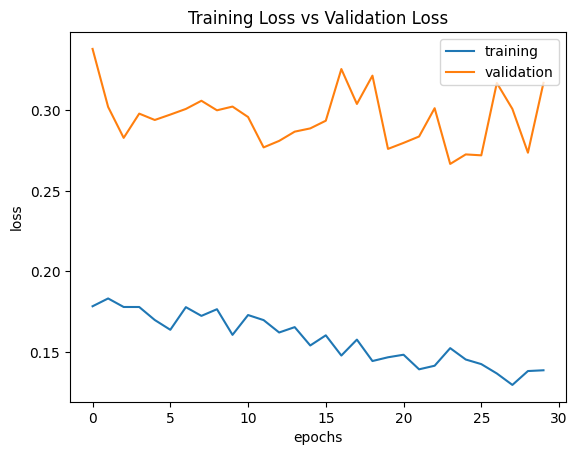

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

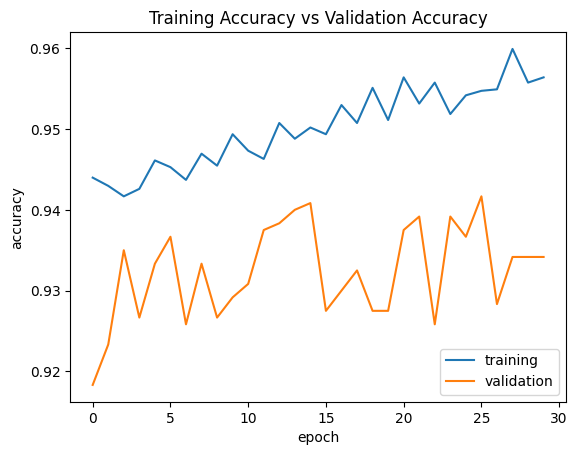

In [55]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()


In [56]:
classifier.load_weights('train_weights4.h5')
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 10,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights5.h5')

Epoch 1/10
338/338 [==============================] - 8s 22ms/step - loss: 0.1419 - accuracy: 0.9539 - val_loss: 0.2956 - val_accuracy: 0.9350
Epoch 2/10
338/338 [==============================] - 8s 23ms/step - loss: 0.1301 - accuracy: 0.9591 - val_loss: 0.2859 - val_accuracy: 0.9367
Epoch 3/10
338/338 [==============================] - 10s 31ms/step - loss: 0.1339 - accuracy: 0.9570 - val_loss: 0.2990 - val_accuracy: 0.9375
Epoch 4/10
338/338 [==============================] - 8s 23ms/step - loss: 0.1279 - accuracy: 0.9590 - val_loss: 0.3183 - val_accuracy: 0.9333
Epoch 5/10
338/338 [==============================] - 9s 26ms/step - loss: 0.1337 - accuracy: 0.9569 - val_loss: 0.3135 - val_accuracy: 0.9242
Epoch 6/10
338/338 [==============================] - 9s 27ms/step - loss: 0.1423 - accuracy: 0.9554 - val_loss: 0.2945 - val_accuracy: 0.9350
Epoch 7/10
338/338 [==============================] - 8s 22ms/step - loss: 0.1344 - accuracy: 0.9587 - val_loss: 0.3605 - val_accuracy: 0.919

In [57]:
classifier.evaluate(test_set)

94/94 [==============================] - 1s 13ms/step - loss: 0.2808 - accuracy: 0.9427


[0.2807987630367279, 0.9426666498184204]